# Linear Regression Analysis on the Vehicle Dataset 

## Abstract

Link to the dataset: [Car Data: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho] 

The dataset has been sourced from Kaggle, provided by `NEHAL BIRLA AND 2 COLLABORATORS.`
The data provided pertains to information related to the sale of pre-owned vehicles. These vehicles in the dataset have either been sold from a dealership or sold privately. This analysis serves as a way of determining which factors contribute to the price that these pre-owned vehicles have been sold at, and to what extent these factors affect the selling price of the vehicle. 

The analysis will follow this order:

1. EDA (Exploratory Data Analysis) - An analysis of the data, where quick insights can be learned, and uninformed assumptions can be made. This EDA will also allow for the cleaning and pre-processing of the data if needed.
<br><br>
2. Data Visualisations - Visualising the data being observed in statistical plots.
<br><br>
3. Statistical Analysis - Determining the correlation between the independent variable(s), being the factors that have an effect on the selling the price of the vehicle, and the dependent variable, being the selling price of the vehicle.
<br><br>
4. Model Building & Prediction Generation - Initialising the regression model, fitting the data to the model, testing the model on the fitted data, and then generating predictions on what the model assumes will be the selling price based on what it has learned.
<br><br>
5. Model Assessment - Assessing how the model performed, and making inferences/disclosing information on its performance.
<br><br>
6. Closing thoughts & Findings - Revealing what the model's performance indicates, and what its predictions suggest.
<br><br>
7. Sources - Links of the sources used to complete this analysis.

### Required Libraries

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS

# Setting the styling of the visualisations
sns.set()

## Exploratory Data Analysis

In [3]:
# Reading the data into a pandas DataFrame
data = pandas.read_csv("data/cars.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### Data Exploration

In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


The following information can be discerned from the statistics table above:

* Information related to 301 cars has been provided in the dataset.
<br><br>
* The lowest price recorded for a vehicle is 0.1. It is extremely unlikely that a vechile would be sold for 10 cents, therefore, we may assume that the vehicle prices have been scaled in some way. It may be assumed that the prices have each been divided by either one of 10 000 or 100 000. Again, this is dependent on the region because if this dataset is related to prices in a region like the United States of America (USA), then it is very unlikely that a used vehicle would be sold for 3.5 million dollars, however, a used vehicle may go for that price in a different region. It will be assumed that these vehicle prices pertain to the USA and have therefore been divided by 10 000. Therefore, the lowest price a vehicle has been recorded at is 1 000 dollars. The highest recorded price being 350 000 dollars.
<br><br>
* The oldest car model recorded is 2003, with the most recent model being 2018.
<br><br>
* The average selling price of the vehicles is 46 612.96 dollars, with a standard deviation of 50 828.12 dollars. This standard deviation informs us of the variance of the vehicle prices from the average selling price. So in essence, the vehicle prices are very far apart from each other. Why that is will be investigated in this analysis.
<br><br>
* The present price of the vehicles may pertain to the current value of the vehicles. What this statististic is suggesting however, does not comply with reasonable logic. A used vehicle does not appreciate in value. The moment a vehicle leaves the shop floor, the value drops immediately. So if a vehicle depreciates when it is bought and owned for the first time, it cannot appreciate when it is bought and owned for a second, third, or even a fourth time.
<br><br>
* There are vehicles recorded to have had no owners, and vehicles that have had up to three different owners. This will be investigated.
<br><br>
* The highest mileage recorded from the vehicles in the dataset is 500 000km, with the lowest recorded being 500km.


Final note:

The lowest recorded year is 2003, with the latest year recorded being 2018. The statistical table above reveals that the average year is 2013, indicating that the majority of vehicles recorded in this dataset may be considered "new models" as opposed to old vehicles. One may assume that the majority of vehicles are at least from 2010 and above. This will also be investigated to determine whether some vehicles in the dataset may fetch a higher price due to their "old status." These vehicles may be collectibles afterall.

In [7]:
data["Car_Name"].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [8]:
data["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [9]:
data["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [10]:
data["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [11]:
# Checking for null values
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
# Checking whether null values may have been substituted for zeroes
zero_mask = data == 0
zero_counts = zero_mask.sum()
zero_counts

Car_Name           0
Year               0
Selling_Price      0
Present_Price      0
Kms_Driven         0
Fuel_Type          0
Seller_Type        0
Transmission       0
Owner            290
dtype: int64

### Observations

* There are significantly more manual transmission vehicles than automatic transmission vehicles.
<br><br>
* A significant portion of the vehicles in the dataset are Petrol vehicles, with the other two fuel types being Diesel, and CNG. "CNG" vehicles refer to natural gas vehicles.

### Data Cleaning

After observations, this dataset appears to be relatively clean. This suggests that there are neither data inconsistencies nor null values in the set. The data will be visualised to ensure that this rings true.

Some columns will be converted to numerical values so that they can be fitted to the linear model later on, and observed. These columns will be `Fuel_Type`, `Seller_Type`, and `Transmission`.

In [13]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
# Converting Petrol = 0, Diesel = 1, and CNG = 2
data["Fuel_Type"] = data["Fuel_Type"].map({"Petrol": 0, "Diesel": 1, "CNG": 2})

# Converting Dealer = 0, Individual = 1
data["Seller_Type"] = data["Seller_Type"].map({"Dealer": 0, "Individual": 1})

# Converting Manual = 0, Automatic = 1
data["Transmission"] = data["Transmission"].map({"Manual": 0, "Automatic": 1})

In [15]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Data Visualisation

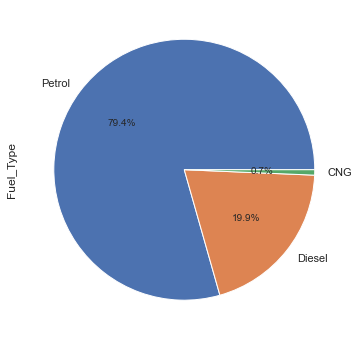

In [16]:
# Visualising the spread of fuel type data
data["Fuel_Type"].value_counts().plot(kind = "pie",
                                      figsize = (6, 6),
                                      labels = ["Petrol", "Diesel", "CNG"],
                                      autopct="%1.1f%%"
                                      )
plt.show()

As seen above, it is clear that the number of petrol vehicle types dominates the other fuel types. 

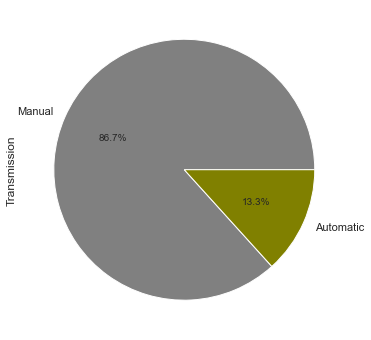

In [17]:
data["Transmission"].value_counts().plot(kind = "pie",
                                         labels = ["Manual", "Automatic"],
                                         autopct = "%1.1f%%",
                                         figsize = (6, 6),
                                         colors=["grey", "olive"]
                                        )
plt.show()

Manual transmission vehicles dominate the number of automatic vehicles. According to DRiV Parts, automatic vehicles are now dominating sales as of 2020. An estimated 95% of vehicles sold in the United States were automatic transmission vehicles due to their ease of use - the driver only has to change gears once and focus on the road. This serves as a reminder that the vehicle data collected ends at 2018 models. Now this does not mean that the last sale recorded was in 2018, only that the most recent vehicle recorded was a 2018 model. A simple explanation as to why manual transmission dominates automatic is that these are pre-owned vehicles that are being sold. Most of which anyways. A comprehensive analysis would lead one to identify whether the owners of these vehicles were selling them to switch to automatic transmission vehicles. 

Another interesting note to make is that manual transmission vehicle sales are likely to plummet and only a select few of individuals will still make use of manual transmission vehicles. This is in light of the drive to produce electric vehicles (EVs). Not only are Tesla working towards dominating the EV market, but competitors have now joined the fight in BMW, Mercedes, Land Rover, and others to name a few. Announced on the 22 July 2021, by Mercedes in Stuttgart Germany, Mercedes plans to go all-electric by the end of the decade (2030). The organisation has pledged an amount in excess of 40 billion euros towards research and development into electric-only vehicles. Along with the announcement, is Mercedes' intention to switch from electric-first vehicles, to electric-only vehicles. From 2025 onwards, the company plans to launch electric-only architectures, with three of them planned for 2025. This will likely encourage other competitors such as BMW, to ramp their developments in electric vehicles up significantly.

This information is noted due to the increased standard of living many countries are facing now. Rising prices have seen to it that affordability of goods is becoming difficult to manage, and this factor may affect the market share of Petrol, Diesel, Natural Gas, and other gas type vehicles against the market share of EVs. As organisation's such as Tesla are now offering renewable sources of energy, on top of EVs, it may be assumed that more will adopt the full scope of product offering. Much like how Apple has created an ecosystem where the owner of an iPhone is likely to own a MacBook, an iPad, AirPods, and an Apple Watch, consumers may look to invest in solar-powered housing, an electric vehicle, and so on. These are only assumptions however.

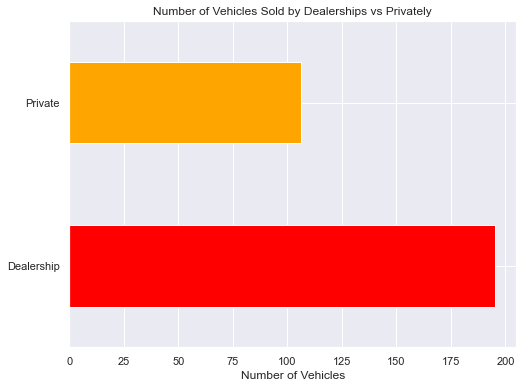

In [26]:
# Calculate value counts for "Seller_Type"
seller_counts = data["Seller_Type"].value_counts()

# Create the horizontal bar plot
ax = seller_counts.plot(kind = "barh",
                        color = ["red", "orange"],
                        figsize = (8, 6))
                        
# Set x-axis label
ax.set_xlabel("Number of Vehicles")

# Set x-axis tick labels
ax.set_yticklabels(["Dealership", "Private"])

# Set plot title
ax.set_title("Number of Vehicles Sold by Dealerships vs Privately")

# Show the plot
plt.show()

Evidently, the number of pre-owned vehicles sold are predominantly from a dealership. This may be because consumers are more trusting of a vehicle that has been owned by a reputable entity. While both dealerships and private owners seek payment for the vehicle, private owners do not have a reputation to uphold. It is very easy for a private owner to conceal the history of a vehicle, such as the accidents it has been involved in, issues they have faced in the past, and other implications hurting the value of the vehicle. Whereas a dealership has a reputation to uphold. If it is discovered that the dealership is hiding important information from its customers, the brand will suffer. This does not prevent dealerships from committing this act though, only that the repercussions may be more detrimental to their future than that of a private owner. 

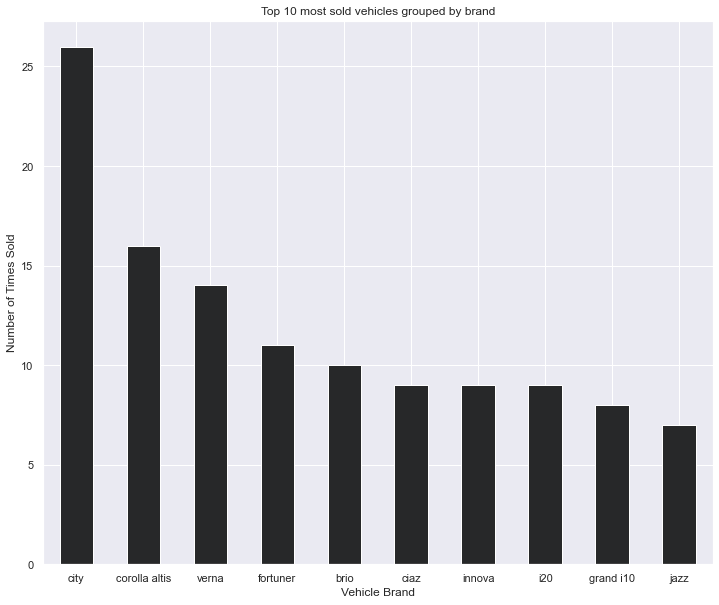

In [39]:
data["Car_Name"].value_counts().nlargest(10).plot(kind = "bar",
                                     figsize = (12, 10),
                                     xlabel = "Vehicle Brand",
                                     ylabel = "Number of Times Sold",
                                     color = "#272829",
                                     rot = 0,
                                     title = "Top 10 most sold vehicles grouped by brand"
                                    )
plt.show()

In [44]:
wordcloud_data = data["Car_Name"].value_counts().nlargest(10).index # top 10 car brand names

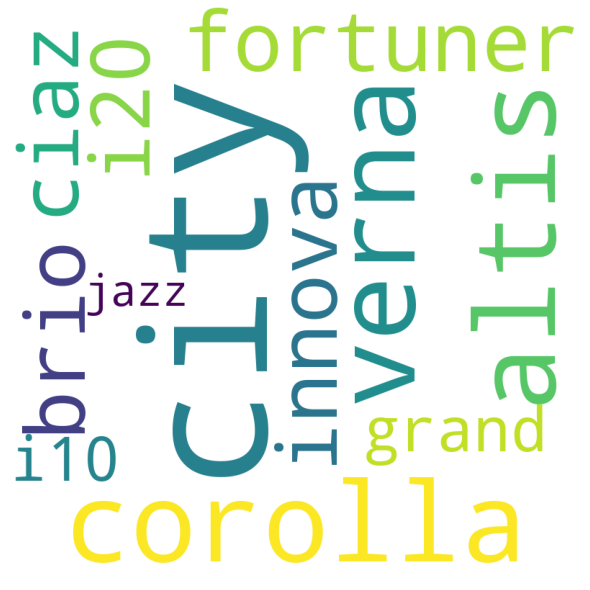

In [52]:
comment_words = ""
stopwords = set(STOPWORDS)

for value in wordcloud_data:
     
    # typecaste each value to string
    value = str(val)
 
    # split the value
    tokens = value.split()
     
    # Converts each token into lowercase
    for index in range(len(tokens)):
        tokens[index] = tokens[index].lower()
     
    comment_words += " ".join(tokens) + " "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color = "white",
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

"City" shows up as the most sold vehicle in the set. 

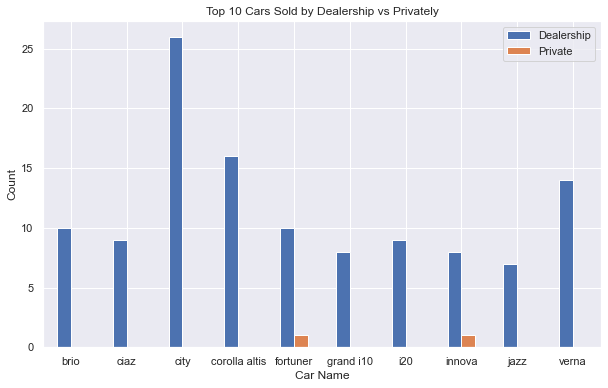

In [59]:
# Count the occurrences of each car name
top_cars = data["Car_Name"].value_counts().nlargest(10)

# Group the top car names by seller type and count occurrences
seller_grouped = data[data["Car_Name"].isin(top_cars.index)].groupby(["Car_Name", "Seller_Type"]).size().unstack(fill_value=0)

# Plot the grouped data
ax = seller_grouped.plot(kind="bar", stacked=False, figsize=(10, 6))
ax.set_xlabel("Vehicle Brand")
ax.set_ylabel("Count")
ax.set_title("Top 10 Cars Sold by Dealership vs Privately")
ax.legend(["Dealership", "Private"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Show the plot
plt.show()

The above bar plot reveals that the most sold vehicle is from a dealership, not privately sold. Only two vehicles of the vehicles recorded within the top 10 most sold vehicles have been sold privately. But only one of each, the rest being from a dealership.

### Statistical Analysis

Having visualised certain features of the dataset, questions have cropped up. These are the following questions that the analysis aims to answer:

* What is the correlation between the model year and the selling price?
<br><br>
* By how much does the number of kilometres driven affect the price of the vehicle?
<br><br>
* What is the biggest contributor to the selling price of the vehicle? Is it the kilometres driven? Is it the year model of the vehicle? Is it the number of owners the vehicle has previously had? Is it the fuel price or the current market price of the vehicle? All of these are contributing factors, but the aim of this analysis is to determine which factor plays the biggest role.
<br><br>
* Is the vehicle brand perhaps the biggest selling factor? Or the transmission type of the vehicle?


In [66]:
data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000


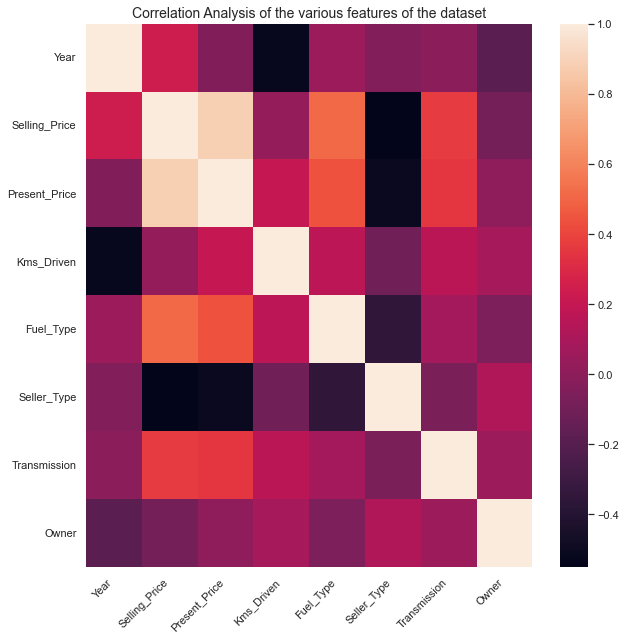

In [81]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(data=data.corr())

# Rotate x-axis labels to a specified angle
ax.set_title("Correlation Analysis of the various features of the dataset", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.show()

### Breakdown of the correlation analysis above:

* The year of the model has the strongest correlation to the selling price of the vehicle. It is the strongest of the factors, but it does not affect it that much.
<br><br>
* Selling price has the strongest correlation to the current price, which is a very interesting find. The fuel type of the vehicle seems to play a big enough role to take note of as well, and transmission coming in as the third contributing factor. This find is very interesting because it may lead one to believe that dealerships price their pre-owned vehicles based on the current market price of new vehicles of that brand. So say the market price for a Ferrari is 2 million dollars, dealerships are likely to use that figure as a "yard-stick." They may want to be close to that number, therefore, pricing their pre-owned vehicles at a value that is close enough to 2 million dollars. Fuel type plays a big role as well, but this may be dependent on the region. As assumed earlier, these vehicle sales may be related to vehicles sold in the USA. As an assumption, it could be that access to certain fuel has an effect on this. It may be that petrol is readily accessible, maybe slightly even more affordable than diesel, and natural gas. Further research may provide more information, and answer the question.
<br><br>
* The same may be said for the present price. The selling price has the highest correlation to the present price, fuel type, and transmission type. 
<br><br>
* The seller type (whether it is a dealership or a private sale) has a negative correlation to the selling price. This means that the selling price is very likely to be negatively affected if the vehicle is sold privately, as opposed to being sold at a dealership. This is a great find as it indicates that consumers are more trusting of reputable dealerships, largely because dealerships have more to lose if the sale does not appear to be in favour of the consumer. Again, branding plays a big role here. Consumers seem to appreciate the sale from a source that they know, can trust, and have likely purchased a vehicle from already.
<br><br>

While there are other factors at play, it is clear to see which factors play the biggest role in determining the selling price of the vehicle. These factors include, but are not limited to:

1. The current price of a brand new model of the vehicle
2. The seller type (whether it is from a dealership or a private sale)
3. The fuel type of the vehicle
4. The type of transmission of the vehicle

It is very surprising that the number of owners the vehicle has had does not affect the selling price to the extent that the above 4 factors do. This includes the number of kilometres driven. Why kilometres do not play a significant role will be investigated.

In [84]:
data["Kms_Driven"].mean()

36947.20598006644

The above return reveals that the average number of kilometres driven is 36 947.21km. This explains why the number of kilometres driven does not play a significant role. A pre-owned vehicle that has not exceeded 40 000km is a good find, which would also explain why the selling price is so close to that of the current price. Because these vehicles have not been used excessively, they may be passed off as "relatively new", therefore allowing dealerships to price them close to the current market value of the vehicle. This has shed more light on the dataset.

### Linear Regression Model

Having observed the features, the next step will involve building a linear regression model to generate predictions on the selling price, based on the four factors listed above, being the current price of the vehicle, the fuel type of the vehicle, the transmission type of the vehicle, and the seller type of the vehicle. As it was not mentioned earlier, the correlation analysis reveals that automatic vehicle transmissions are likely to fetch a higher price than manual transmission vehicles, even though the majority of vehicles in the dataset are manual vehicles.

#### Assigning Model Variables

In [86]:
# Independent Variables
x = data[["Present_Price", "Seller_Type", "Transmission", "Fuel_Type"]].values.reshape(-1, 4)

# Dependent Variable
y = data["Selling_Price"].values

In [87]:
# Separating the values into training and test sets (80:20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [88]:
# Initialising the model
model = LinearRegression().fit(x_train, y_train)

In [89]:
# Generating predictions 
predictions = model.predict(x_test)
predictions[:10]

array([ 6.81729252,  0.3333526 ,  3.77537923,  7.722553  , 12.46605813,
        3.88647938,  4.22389465,  0.21978355,  5.60559152,  5.29786276])

#### Observing Model Performance

#### Formula for Adjusted R-Squared

$R^2_{adj.} = 1 - (1 - R^2) * \frac{n - 1}{n - p - 1}$

* `n` - Number of observations
<br> <br>
* `p` - Number of predictors

In [91]:
coefficients = model.coef_
intercept = model.intercept_
r2 = model.score(x_test, y_test)

In [92]:
coefficients

array([ 0.41148204, -1.43646318,  1.38169688,  1.51942976])

The coefficients above reveal which factors affect the selling price. The model has determined "Transmission" and "Fuel Type" to be the values with the largest coefficients, indicating that the model has identified these two variables to be the largest contributors to an increase in price. It has also identified that "Seller Type" that is not a dealership will have a significantly negative effect on the selling price. This agrees with the findings discovered earlier in this analysis.

In [93]:
r2

0.8414839496906901

In [95]:
n = x_test.shape[0]
p = x_test.shape[1]

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
adjusted_r2

0.8301613746685965

$R^2$ and $R^2_{adj.}$ show promising signs of the model's performance. $R^2$ informs us that 84% of the dependent variable's variance is explained by the independent variables. This suggests that the variables current price, seller type, transmission, and fuel type explain a significant portion of the variance. The $R^2_{adj.}$ is a precautionary measure included to assess the model's true performance. With this value being very close to $R^2$, the $R^2_{adj.}$ suggests that the number of irrelevant independent variables provided to the model are not prevalent. It is important to note that the variable with the coefficient that may be resulting in the model's performance is the current price of the vehicle. The coefficient `0.41148204` suggests that the current price does play a role, but not as much as the other three factors.

### Visualising Model Performance

In [113]:
x_variables = ["Market Price", "Seller Type", "Transmission", "Fuel Type"]

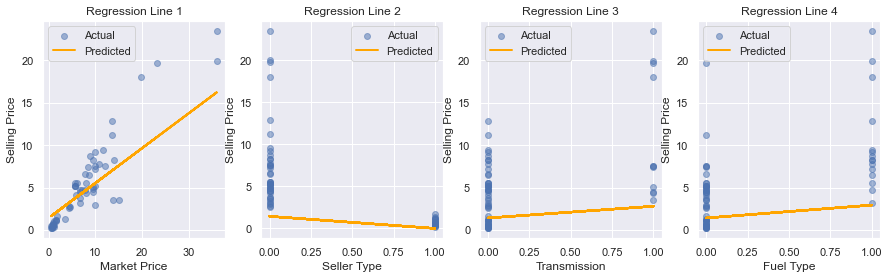

In [116]:
fig, axes = plt.subplots(1, x_test.shape[1], figsize=(15, 4))

# Visualize Regression Lines for each independent variable
for index, ax in enumerate(axes):
    x_var = x_test[:, index] # independent variable
    pred_var = intercept + np.dot(x_var, model.coef_[index]) # regression line formula per independent variable
    
    ax.scatter(x_var, y_test, label="Actual", alpha=0.5)
    ax.plot(x_var, pred_var, color="orange", linewidth=2, label="Predicted")
    ax.set_xlabel(x_variables[index])
    ax.set_ylabel("Selling Price")
    ax.set_title(f"Regression Line {index + 1}")
    ax.legend()
    

ax.legend()
plt.show()

The visualisations above reveal that the variable with the strongest linear relationship to the selling price is the fuel type of the vehicle on the market. A negative linear relationship between the type of seller is visualised, once again revealing that the selling price will be negatively affected if the the vehicle is not from a dealership. The reason for Transmission and Fuel Types lower linearity appearance is a result of the data being scaled. It is clear that there is a linear relationship between the selling price and these variables, but because they have been transformed to 0s and 1s, the linear relationship is not visualised fully. It is clear that there is a linear relationship however. 

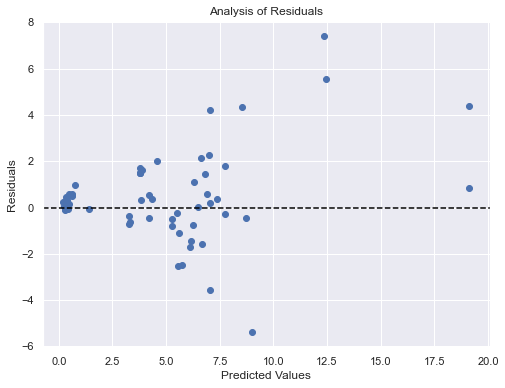

In [115]:
# Visualising the Residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals)
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Analysis of Residuals")
plt.show()

This residual analysis is a good sign of the model's performance. For context, any values above the line may be deemed overestimates made by the model. This means that the model estimated the selling price higher than the actual value. Additionally, any value below the black horizontal line indicates that the model underestimated the selling price lower than the actual value. It is promising to see that a large concentration of the values are close to the line, meaning that the model performs the task relatively well, based on the limited data it has been trained on. 

More training and tuning may lead to better results of course, or perhaps a different model may yield better results. This investigation has answered a few questions and led to interesting finds. But again, it is important to note that the dataset used is very limited. Only 301 records were observed and analysed, therefore limiting the training data that can be provided to the model. Perhaps with more training, the model may perform better, or it may lead to overfitting. Overfitting is a phenomenon that describes a situation where a model has "memorised" the data instead of learning the underlying logic of the data. So like in school, where students are trained to memorise material instead of identifying the underlying patterns. But that is a topic for another project haha! 

# Closing Thoughts

While this may not be deemed a thorough analysis, it has provided a platform to explore further. As the data is very limited, assumptions generalised to the population would not make sense. There are various unaccounted factors that may yield different results in another analysis. What is clear though is that the selling price of a vehicle is likely determined by the market value, the transmission type of the vehicle (whether it is a manual or automatic), the fuel type (petrol, diesel, or natural gas), and the seller type. This is confirmed by these findings:

* Automatic vehicles fetch a higher price than manual vehicles
<br><br>
* Diesel vehicles fetch a higher price than petrol, and natural gas vehicles
<br><br>
* A higher market value of the vehicle will fetch a higher selling price as sellers may be encouraged to sell the pre-owned vehicle close to the market value of a newer version of the vehicle.
<br><br>
* Selling from a dealership will fetch a higher price for the vehicle, likely because of the brand that will be associated with the seller of the vehicle playing a big role in determining the price.

There are other factors that may determine the selling price of course, but these are findings that have cropped up from this analysis. Perhaps a deeper analysis may reveal different findings. More studies are encouraged here to get to the real answer and contribute to the analysis' comprehensiveness. Regardless, the exploration and analysis was a fun endeavour. More to come soon!

## Sources:

* Driv Parts: 
https://www.drivparts.com/parts-matter/learning-center/driver-education-and-vehicle-safety/manual-vs-automatic-car.html#:~:text=Popular%20in%20the%20US%20%2D%2095,fluid%20and%20planetary%20gear%20set.

* Mercedes Benz: https://media.mbusa.com/releases/release-ee5a810c1007117e79e1c871354679e4-mercedes-benz-prepares-to-go-all-electric

* Car and Driver: https://www.caranddriver.com/shopping-advice/a32494027/ev-vs-gas-cheaper-to-own/

* Robb Report: https://robbreport.com/motors/cars/mercedes-benz-end-eq-line-not-evs-1234795471/

* Daily Maverick: https://www.dailymaverick.co.za/article/2020-06-22-are-manual-cars-still-a-thing-is-there-even-a-future-for-the-old-gear-stick/